### Import Libraries ###

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

keras.backend.set_image_data_format('channels_last')

In [2]:
import os
for dirname, _, filenames in os.walk('D:\\Projects\\MNIST Digit Classification\\'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Projects\MNIST Digit Classification\MNIST Digit Classification.ipynb
D:\Projects\MNIST Digit Classification\sample_submission.csv
D:\Projects\MNIST Digit Classification\test.csv
D:\Projects\MNIST Digit Classification\train.csv
D:\Projects\MNIST Digit Classification\.ipynb_checkpoints\MNIST Digit Classification-checkpoint.ipynb


### Load the Data ###

In [3]:
mnist_train = pd.read_csv('D:\\Projects\\MNIST Digit Classification\\train.csv')
mnist_test = pd.read_csv('D:\\Projects\\MNIST Digit Classification\\test.csv')

display(" train data",mnist_train )
display(" test data",mnist_test )

' train data'

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


' test data'

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
image_size=28*28
image_size

784

### Get train and test data ###

In [5]:
# Convert to trian and test data; Preserve original dataset
X_train = mnist_train.drop('label', axis=1).copy()
X_test = mnist_test.copy()
Y_train = mnist_train['label'].copy()

In [6]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
# Normalize values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# Reshape to 28 x 28 so that we can see the image ie. handwritten number
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

### Display images ###

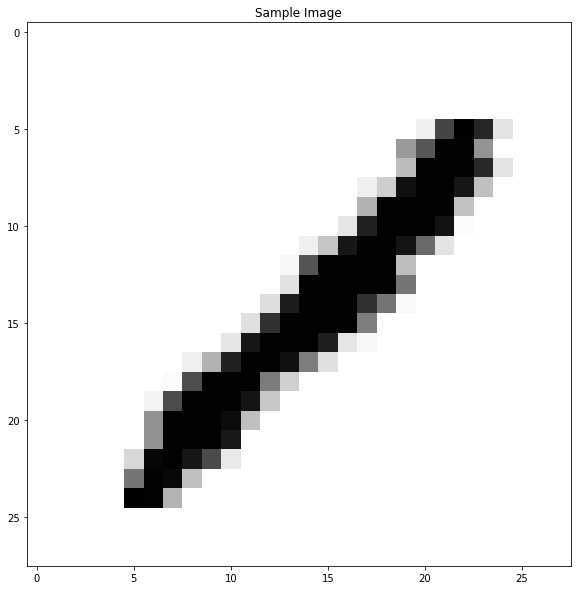

In [9]:
import random
no_images=len(X_train)

# Display random Image
fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest') 

# replace random.randint(0,no_images) in code above with a number if you want to see specific image. 
#This dispalys a random image each time

plt.title("Sample Image")
plt.show()

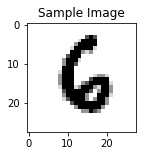

In [10]:
# Display random Image
fig, ax = plt.subplots(figsize=(2,2)) # now fix size is 2 x 2

plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest')
plt.title("Sample Image")
plt.show()

#### Data Conversion ####

In [11]:
validation_size= 0.2  #you can change this as per our preference


# Split between train and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size= validation_size)

In [12]:
# Get one hot encoding
Y_train = keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = keras.utils.to_categorical(Y_val, num_classes=10)

### Convolutional Neural Network ###

In [13]:
# Build CNN Model
def CNN():
    model = keras.Sequential()
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='valid', input_shape=(28, 28, 1), name='conv2d_1_1'))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='same', name='conv2d_1_2'))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_1'))
    model.add(layers.Dropout(0.2, name='drop_1'))
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='valid', name='conv2d_2_1'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='same', name='conv2d_2_2'))
    model.add(layers.BatchNormalization(name='bn_2'))
    model.add(layers.Activation('relu', name='relu_2'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_2'))
    model.add(layers.Dropout(0.2, name='drop_2'))
    # FLATTEN > DENSE > CLASSIFICATION
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [14]:
model = CNN()

#### Model Compilation ####

In [15]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_1 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1_2 (Conv2D)          (None, 26, 26, 32)        9248      
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 26, 26, 32)        128       
_________________________________________________________________
relu_1 (Activation)          (None, 26, 26, 32)        0         
_________________________________________________________________
mp2d_1 (MaxPooling2D)        (None, 13, 13, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2_1 (Conv2D)          (None, 11, 11, 64)        1

### Training and Prediction ###

In [17]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=50, verbose=1)

Epoch 1/50
525/525 [==============================] - 34s 65ms/step - loss: 0.2180 - accuracy: 0.9335 - val_loss: 0.0863 - val_accuracy: 0.9705
Epoch 2/50
525/525 [==============================] - 34s 65ms/step - loss: 0.0686 - accuracy: 0.9784 - val_loss: 0.0498 - val_accuracy: 0.9854
Epoch 3/50
525/525 [==============================] - 35s 67ms/step - loss: 0.0521 - accuracy: 0.9830 - val_loss: 0.0407 - val_accuracy: 0.9873
Epoch 4/50
525/525 [==============================] - 36s 68ms/step - loss: 0.0417 - accuracy: 0.9871 - val_loss: 0.0404 - val_accuracy: 0.9881
Epoch 5/50
525/525 [==============================] - 35s 67ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0322 - val_accuracy: 0.9901
Epoch 6/50
525/525 [==============================] - 36s 68ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0372 - val_accuracy: 0.9900
Epoch 7/50
525/525 [==============================] - 36s 69ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0403 - val_accuracy:

### Graphing Accuracy ###

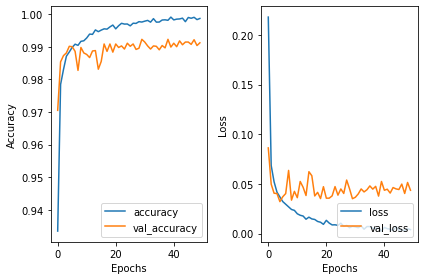

In [18]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Predictions ###

In [19]:
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

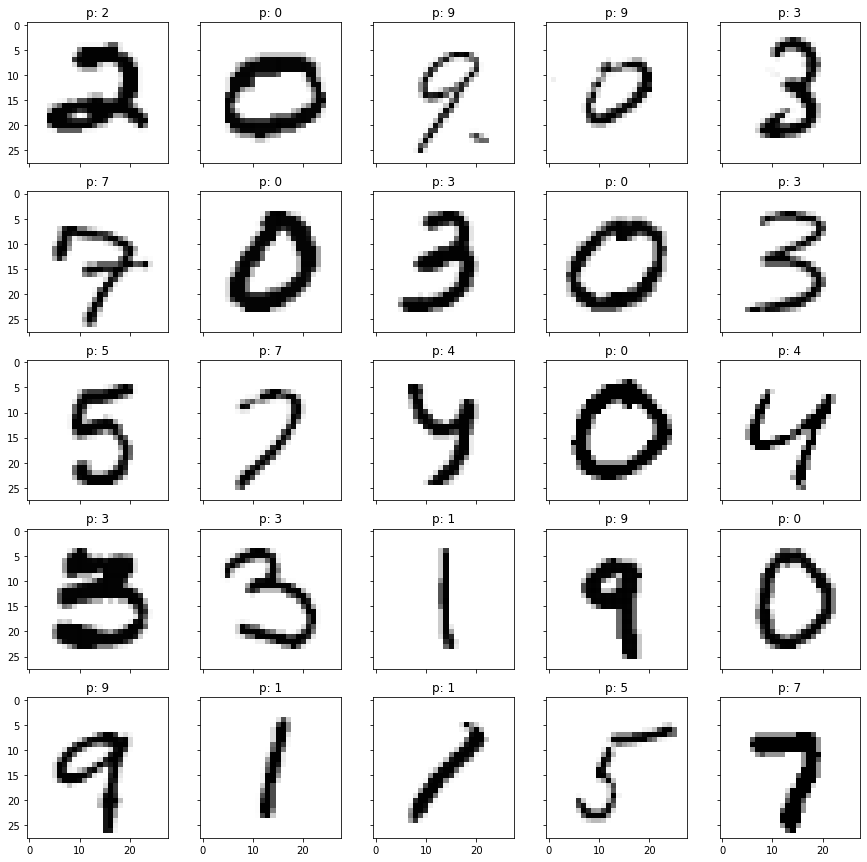

In [20]:
predict(model, X_test, 25)

### Submission ###

In [21]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [22]:
name="Sainath Nanduri"

file_name=name+"_mnist_submission.csv"

In [23]:
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv(file_name, index=False)